# Customer Segmentation and Product Recommendations in E-Commerce

In [100]:
# required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1:Dataset Collection and understanding

In [103]:
# Reading data 
data=pd.read_csv(r"C:\Users\Admin\Documents\New Class Data science\Project04\online_retail.csv")

In [104]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [105]:
data.shape

(541909, 8)

In [109]:
# checking null values 

data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [110]:
data.value_counts()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  Country       
555524     22698      PINK REGENCY TEACUP AND SAUCER        1        2023-06-05 11:37:00  2.95       16923.0     United Kingdom    20
           22697      GREEN REGENCY TEACUP AND SAUCER       1        2023-06-05 11:37:00  2.95       16923.0     United Kingdom    12
572861     22775      PURPLE DRAWERKNOB ACRYLIC EDWARDIAN   12       2023-10-26 12:46:00  1.25       14102.0     United Kingdom     8
572344     M          Manual                                48       2023-10-24 10:43:00  1.50       14607.0     United Kingdom     6
578289     23395      BELLE JARDINIERE CUSHION COVER        1        2023-11-23 14:07:00  3.75       17841.0     United Kingdom     6
                                                                                                                                   ..
553915     21174      POTTERING IN THE SHED METAL SIGN      12      

In [112]:
for i in data:
    print(i)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


In [113]:
# change to lower case for call easy
data.columns = data.columns.str.lower().str.strip()



In [114]:
data.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


# Step 2: 📌 Data Preprocessing:

In [120]:
data["invoiceno"]=data["invoiceno"].astype(str)


In [121]:
data.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [122]:
data[["description","customerid"]].head(10)

,description,customerid
0,WHITE HANGING HEART T-LIGHT HOLDER,17850.0
1,WHITE METAL LANTERN,17850.0
2,CREAM CUPID HEARTS COAT HANGER,17850.0
3,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0
4,RED WOOLLY HOTTIE WHITE HEART.,17850.0
5,SET 7 BABUSHKA NESTING BOXES,17850.0
6,GLASS STAR FROSTED T-LIGHT HOLDER,17850.0
7,HAND WARMER UNION JACK,17850.0
8,HAND WARMER RED POLKA DOT,17850.0
9,ASSORTED COLOUR BIRD ORNAMENT,13047.0


In [124]:
# removing null values

data=data.dropna(subset=["description","customerid"])

In [127]:
# checking
data.isnull().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

In [130]:
data["country"].unique(),data["unitprice"].nunique()

(array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
        'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
        'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
        'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
        'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
        'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
        'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
        'Malta', 'RSA'], dtype=object),
 620)

In [132]:
data.shape

(406829, 8)

In [134]:
data["invoiceno"].str.startswith("C")


0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: invoiceno, Length: 406829, dtype: bool

In [136]:
# removing the cancelled transaction starts with c in the invoiceno
data = data[~data["invoiceno"].str.startswith("C")]


In [138]:
# checked their is no cancelled one
data[data["invoiceno"].str.startswith("C")]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country


In [140]:
print(data.head())         
print(data.shape)           
print(data.isnull().sum()) 

  invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           invoicedate  unitprice  customerid         country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
(397924, 8)
invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64


In [142]:
data["customerid"].isnull().sum()


0

In [144]:
# Remove rows with zero or negative quantities and prices
# removes all rows where quantity is less than or equal to zero and unitprice is less than or equal to zero in one step.
data=data[(data["quantity"]>0) & (data["unitprice"]>0)] 

In [146]:
print(data.isnull().sum())
print(data.duplicated().sum())


invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64
5192


In [147]:
# resetting index
data = data.reset_index(drop=True)


In [150]:
# checking duplicated in data
data.duplicated().sum()


5192

In [151]:
# droping all duplicates in data set

data = data.drop_duplicates().reset_index(drop=True)


In [153]:
# checking
data.duplicated().sum()


0

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    392692 non-null  object 
 1   stockcode    392692 non-null  object 
 2   description  392692 non-null  object 
 3   quantity     392692 non-null  int64  
 4   invoicedate  392692 non-null  object 
 5   unitprice    392692 non-null  float64
 6   customerid   392692 non-null  float64
 7   country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.0+ MB


In [156]:
# change invoicedate to datetime 
data["invoicedate"] = pd.to_datetime(data["invoicedate"])


In [158]:
# checking its types
data["invoicedate"].dtype

dtype('<M8[ns]')

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    392692 non-null  object        
 1   stockcode    392692 non-null  object        
 2   description  392692 non-null  object        
 3   quantity     392692 non-null  int64         
 4   invoicedate  392692 non-null  datetime64[ns]
 5   unitprice    392692 non-null  float64       
 6   customerid   392692 non-null  float64       
 7   country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.0+ MB


In [163]:
data["customerid"].head(25)

0     17850.0
1     17850.0
2     17850.0
3     17850.0
4     17850.0
5     17850.0
6     17850.0
7     17850.0
8     17850.0
9     13047.0
10    13047.0
11    13047.0
12    13047.0
13    13047.0
14    13047.0
15    13047.0
16    13047.0
17    13047.0
18    13047.0
19    13047.0
20    13047.0
21    13047.0
22    13047.0
23    13047.0
24    13047.0
Name: customerid, dtype: float64

In [164]:
data["customerid"].dtypes

dtype('float64')

In [165]:
data["customerid"] = data["customerid"].astype(int)


In [170]:
data["customerid"].dtypes

dtype('int32')

# Step 3 Exploratory Data Analysis (EDA)

In [173]:
data.describe()

,quantity,invoicedate,unitprice,customerid
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2023-07-10 19:13:07.771892224,3.125914,15287.843865
min,1.000000,2022-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2023-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2023-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2023-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2023-12-09 12:50:00,8142.750000,18287.000000
std,180.492832,NaN,22.241836,1713.539549


In [175]:
data.head(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2022-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2022-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2022-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2022-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2022-12-01 08:34:00,1.69,13047,United Kingdom


In [177]:
# creating a total price colounm 
data["total_price"]=data["quantity"]*data["unitprice"]

In [179]:
data.head(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2022-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2022-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2022-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2022-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2022-12-01 08:34:00,1.69,13047,United Kingdom,54.08


In [181]:
# top 10 product

product_sales = data.groupby('description').agg({
    'quantity': 'sum',
    'total_price': 'sum'
}).reset_index()

top_10_products = product_sales.sort_values(by='total_price', ascending=False).head(10)

print(top_10_products)

                             description  quantity  total_price
2319         PAPER CRAFT , LITTLE BIRDIE     80995    168469.60
2767            REGENCY CAKESTAND 3 TIER     12374    142264.75
3698  WHITE HANGING HEART T-LIGHT HOLDER     36706    100392.10
1762             JUMBO BAG RED RETROSPOT     46078     85040.54
1992      MEDIUM CERAMIC TOP STORAGE JAR     77916     81416.73
2611                             POSTAGE      3120     77803.96
2345                       PARTY BUNTING     15279     68785.23
216        ASSORTED COLOUR BIRD ORNAMENT     35263     56413.03
2130                              Manual      6933     53419.93
2656                  RABBIT NIGHT LIGHT     27153     51251.24


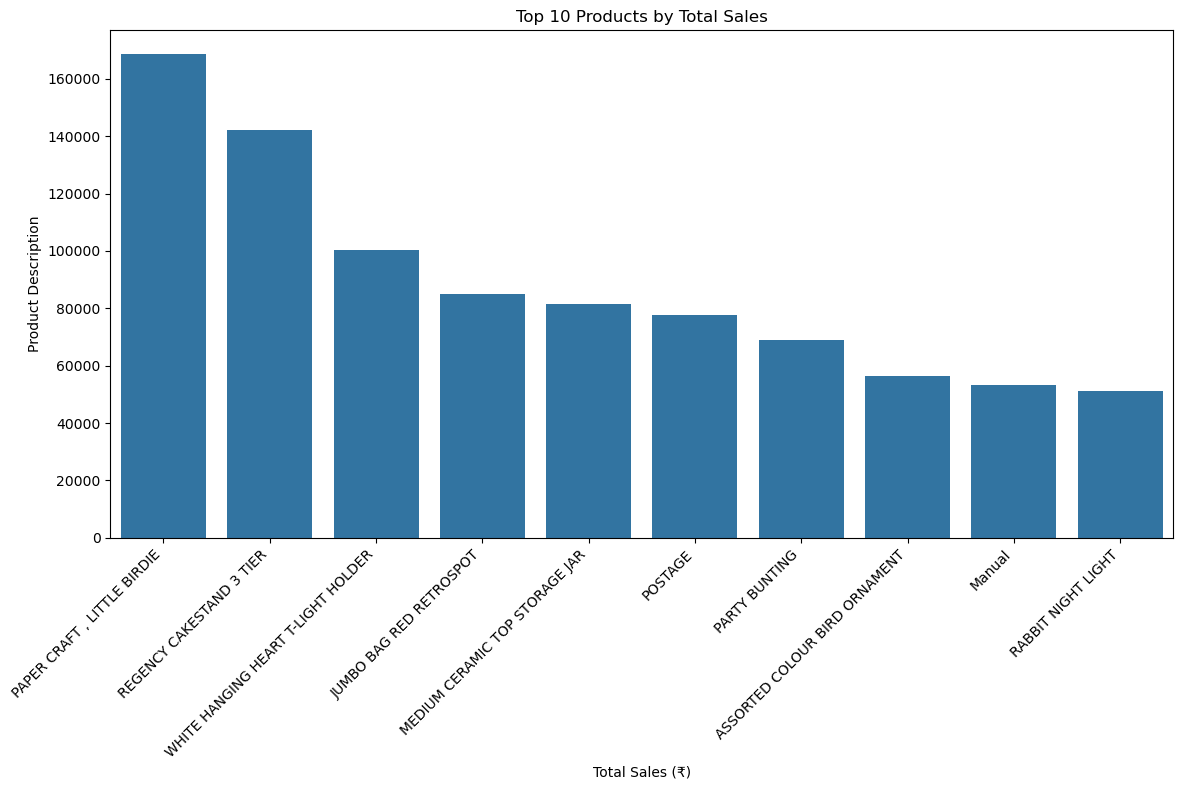

In [183]:
plt.figure(figsize=(12, 8))
sns.barplot(y='total_price', x='description', data=top_10_products)
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Product Description")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


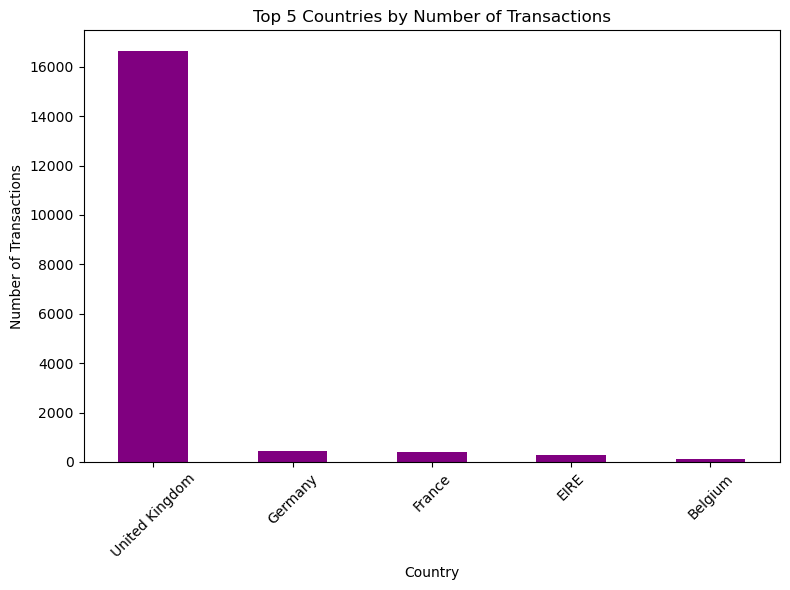

In [185]:
# Top 5 Countries

top5_transactions = data.groupby('country')['invoiceno'].nunique().sort_values(ascending=False).head(5)

top5_transactions.plot(kind='bar', figsize=(8, 6), color='purple')
plt.title('Top 5 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [187]:
# purchase trends over time

data['date'] = data['invoicedate'].dt.date


daily_sales = data.groupby('date').agg({
    'invoiceno': 'nunique',
    'quantity': 'sum',
    'total_price': 'sum'
}).reset_index()

daily_sales.rename(columns={
    'invoiceno': 'num_transactions',
    'quantity': 'total_quantity',
    'total_price': 'total_revenue'
}, inplace=True)


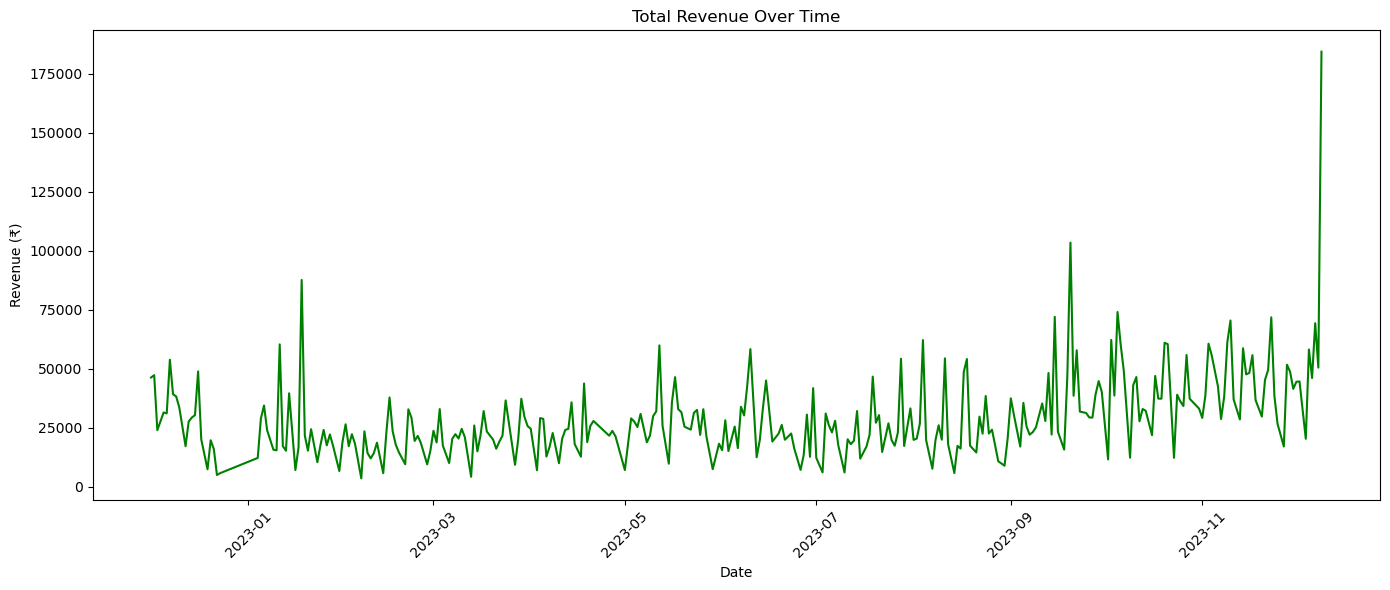

In [189]:
# Total Revenue Over Time
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['date'], daily_sales['total_revenue'], color='green')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


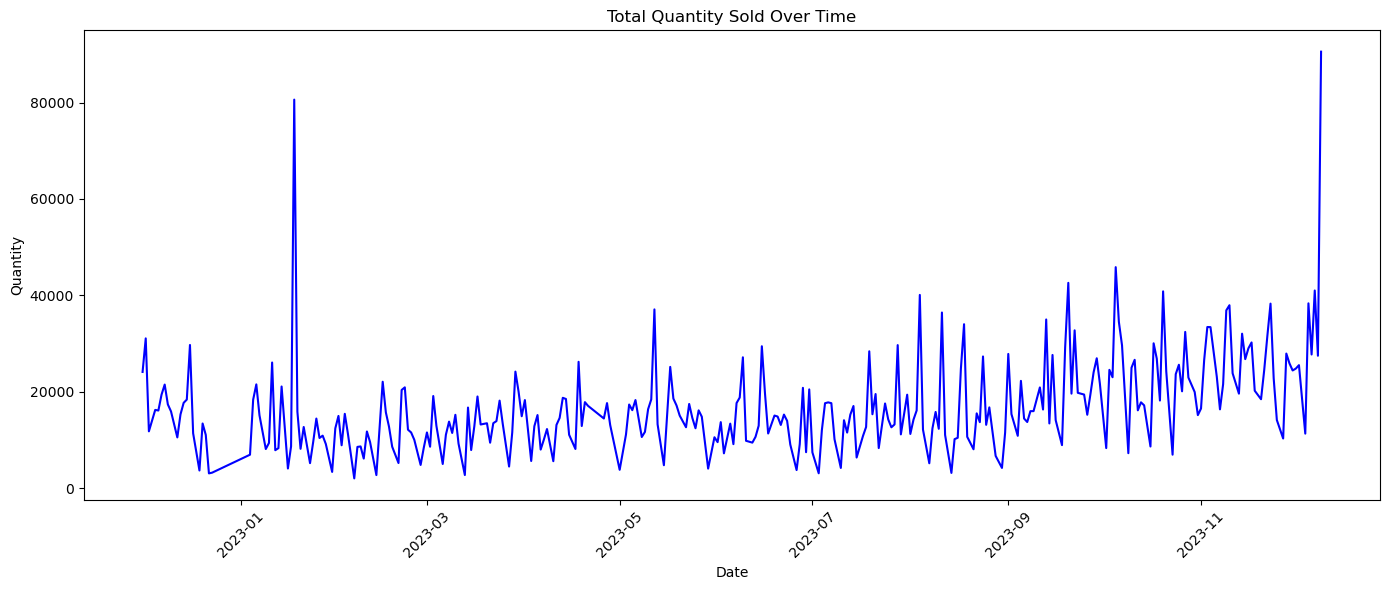

In [191]:
# Total Quantity Sold Over Time
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['date'], daily_sales['total_quantity'], color='blue')
plt.title('Total Quantity Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



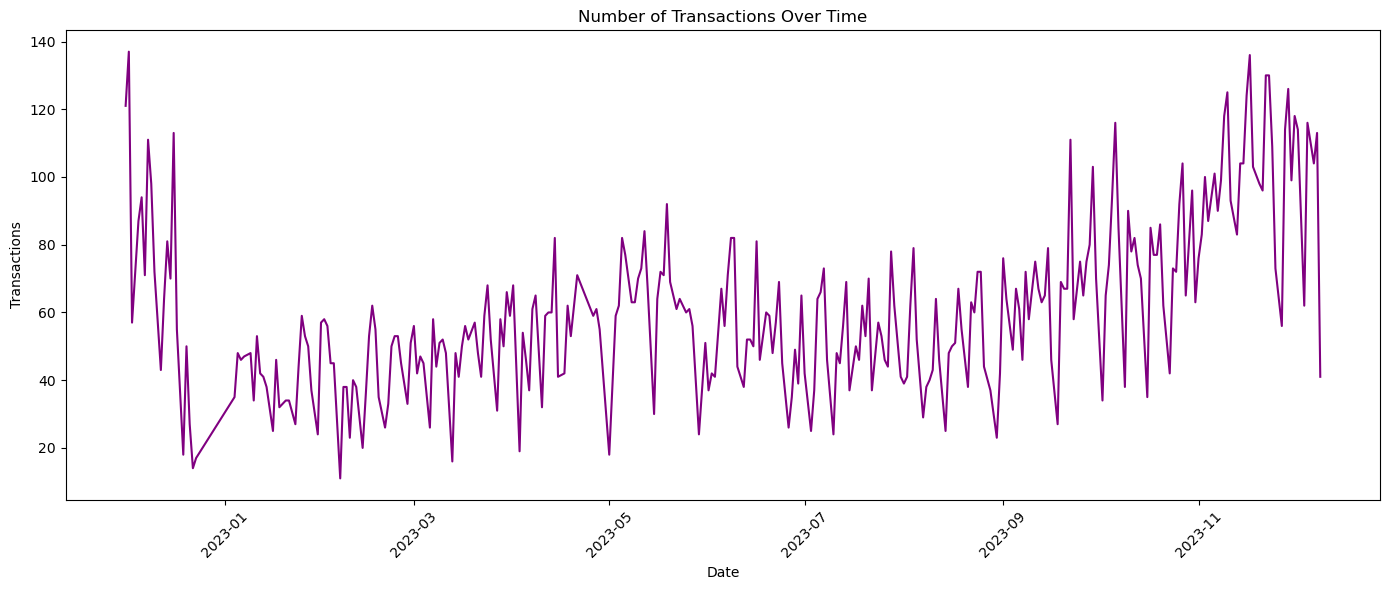

In [193]:
# Number of Transactions Over Time
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['date'], daily_sales['num_transactions'], color='purple')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


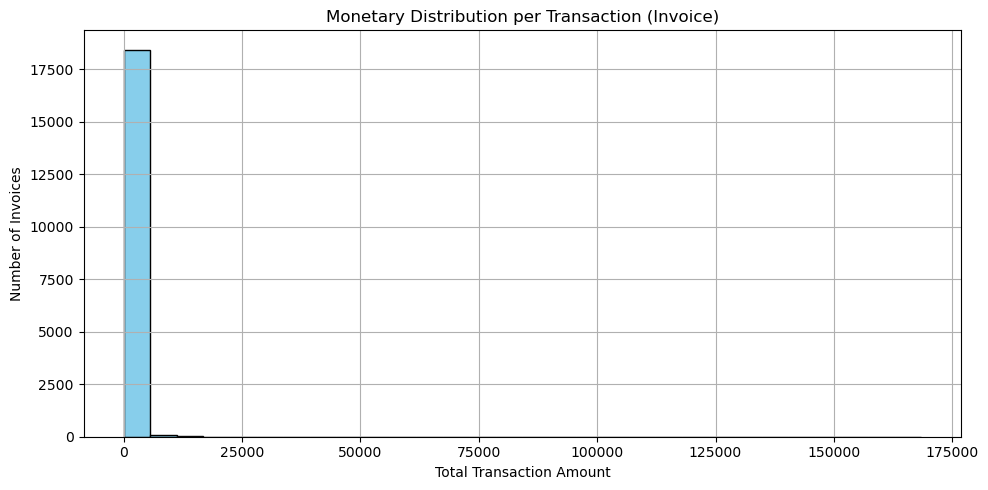

In [195]:

# Inspect monetary distribution per transaction and customer

# Group by CustomerID to get total spend per customer
transaction_monetary = data.groupby('invoiceno')['total_price'].sum()

plt.figure(figsize=(10, 5))
plt.hist(transaction_monetary, bins=30, color='skyblue', edgecolor='black')
plt.title('Monetary Distribution per Transaction (Invoice)')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Number of Invoices')
plt.grid(True)
plt.tight_layout()
plt.show()

In [197]:
data.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_price,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2022-12-01
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2022-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2022-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2022-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2022-12-01


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    392692 non-null  object        
 1   stockcode    392692 non-null  object        
 2   description  392692 non-null  object        
 3   quantity     392692 non-null  int64         
 4   invoicedate  392692 non-null  datetime64[ns]
 5   unitprice    392692 non-null  float64       
 6   customerid   392692 non-null  int32         
 7   country      392692 non-null  object        
 8   total_price  392692 non-null  float64       
 9   date         392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 28.5+ MB


In [201]:
# Reference date = 1 day after last purchase
ref_date = data['invoicedate'].max() + pd.Timedelta(days=1)


In [203]:
# Create the RFM DataFrame
rfm = data.groupby('customerid').agg({
    'invoicedate': lambda x: (ref_date - x.max()).days,  # Recency
    'invoiceno': 'nunique',                              # Frequency
    'total_price': 'sum'                                 # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']



In [204]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


In [221]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4338 non-null   int32  
 1   Recency     4338 non-null   int64  
 2   Frequency   4338 non-null   int64  
 3   Monetary    4338 non-null   float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 118.7 KB


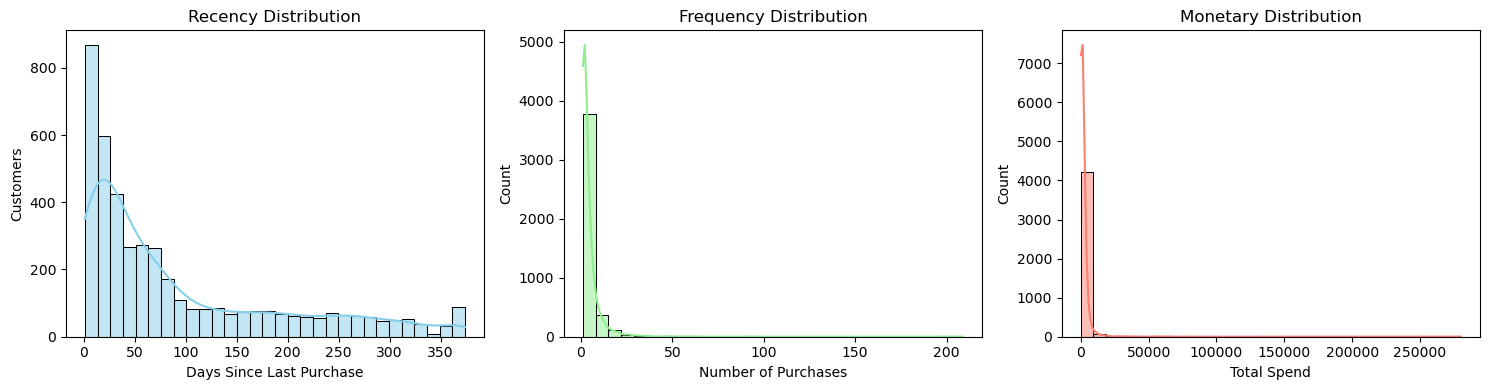

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))

# Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=30, color='skyblue', kde=True)
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Customers')

# Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=30, color='lightgreen', kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')

# Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=30, color='salmon', kde=True)
plt.title('Monetary Distribution')
plt.xlabel('Total Spend')

plt.tight_layout()
plt.show()


In [208]:
data["total_price"].nlargest(10)

392226    168469.60
36521      77183.60
153588     38970.00
116868      8142.75
246041      7144.72
32199       6539.40
108204      6539.40
304623      4992.00
32197       4921.50
108200      4632.00
Name: total_price, dtype: float64

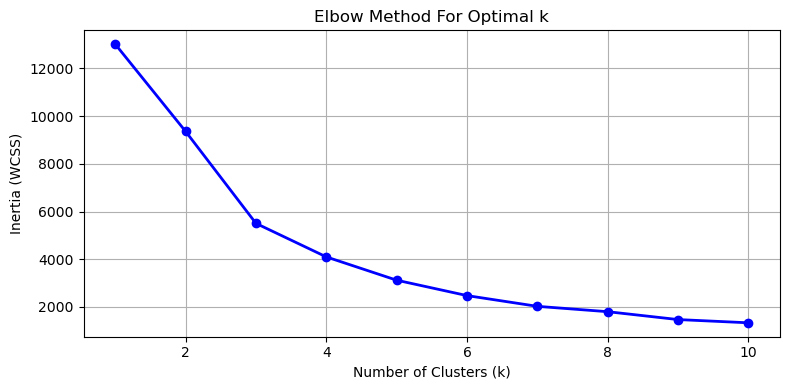

In [256]:

# 2. Define empty list to store inertia values (WCSS)
inertia = []
K = range(1, 11)

# 3. Loop over values of k and fit KMeans
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)  # rfm_scaled must be defined already
    inertia.append(kmeans.inertia_)

# 4. Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-', linewidth=2)  # Blue circle markers with line
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()


In [258]:
# Standardize RFM values for clustering

In [260]:
from sklearn.preprocessing import StandardScaler

# Standardize RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])



In [225]:
# Run KMeans & Analyze Customer Clusters

# Apply KMeans with optimal k (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Customer cluster profile (mean R, F, M per cluster)
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
print(cluster_profile)


         Recency  Frequency  Monetary
Cluster                              
0           43.7        3.7    1353.6
1          248.1        1.6     478.8
2            7.4       82.5  127188.0
3           15.5       22.3   12690.5


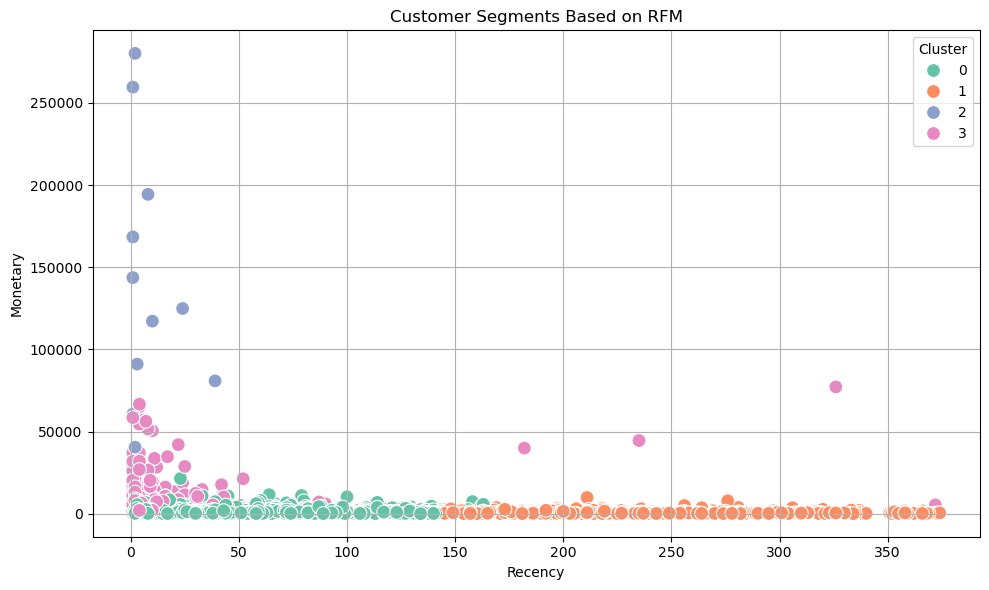

In [227]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments Based on RFM')
plt.grid(True)
plt.tight_layout()
plt.show()


In [228]:
 # KMeans Clustering Visualization for RFM Data

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

# Run KMeans on RFM data
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(rfm_scaled)
rfm['Cluster'] = labels

# Evaluate the model
sil_score = silhouette_score(rfm_scaled, labels)
print(f"Silhouette Score: {sil_score:.2f}")
print(f"Inertia (WCSS): {kmeans.inertia_:.2f}")


Silhouette Score: 0.62
Inertia (WCSS): 4096.30


In [270]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)


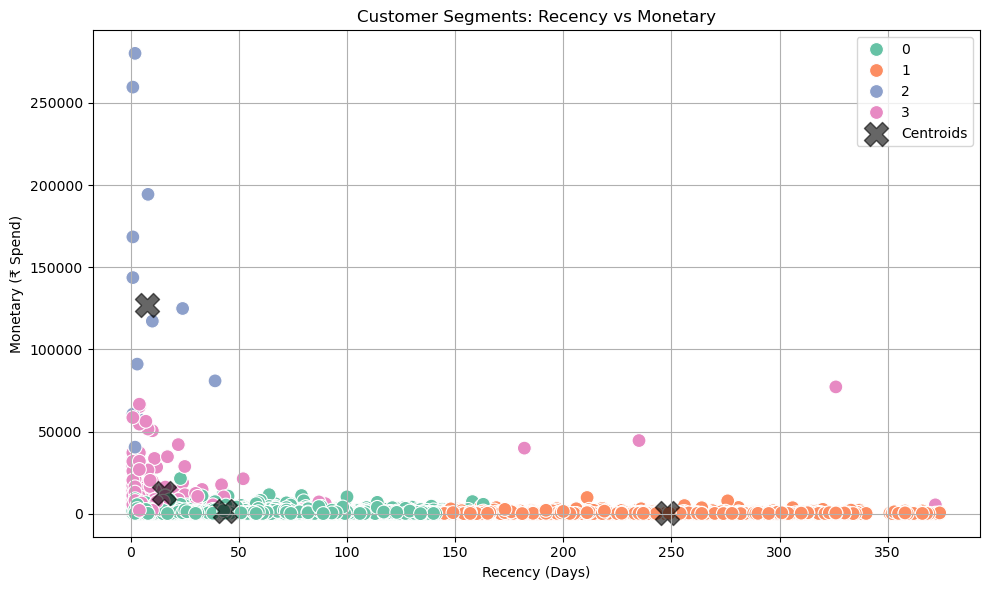

In [230]:
# 2D Visualization (Recency vs Monetary)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=100)

# Plot centroids
centers = kmeans.cluster_centers_

# Get original scale 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm[['Recency', 'Frequency', 'Monetary']])
centers_original = scaler.inverse_transform(centers)

# Plot centroids
plt.scatter(centers_original[:, 0], centers_original[:, 2], 
            c='black', s=300, alpha=0.6, marker='X', label='Centroids')

plt.title("Customer Segments: Recency vs Monetary")
plt.xlabel("Recency (Days)")
plt.ylabel("Monetary (₹ Spend)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [232]:
# Create the Customer–Product Matrix

# Pivot the data
pivot = data.pivot_table(index='customerid', 
                         columns='stockcode', 
                         values='quantity', 
                         aggfunc='sum')

# Fill NaN with 0 (means not purchased)
pivot.fillna(0, inplace=True)


In [272]:
# Compute Cosine Similarity Between Products
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Transpose: now rows = products, columns = customers
product_similarity = cosine_similarity(pivot.T)

# Put it into a DataFrame for easy access
item_sim_df = pd.DataFrame(product_similarity, 
                           index=pivot.columns, 
                           columns=pivot.columns)

item_sim_df


stockcode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
stockcode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.001550,0.000990,0.0,0.000000,0.853895,0.052149,0.021922,0.003033,...,0.000000,0.0,0.000000,0.0,0.000000,0.038765,0.0,0.000310,0.0,0.074260
10080,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.004958,0.020672,0.011878,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000007,0.0,0.000000
10120,0.001550,0.000000,1.000000,0.004911,0.0,0.000000,0.001397,0.027555,0.010435,0.009977,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.007736,0.0,0.000332
10123C,0.000990,0.000000,0.004911,1.000000,0.0,0.000000,0.004417,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10124A,0.000000,0.000000,0.000000,0.000000,1.0,0.491784,0.001099,0.014985,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,0.038765,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.064845,0.153788,0.033250,...,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000441,0.0,0.000955
DOT,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.153670,0.041252,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.000000
M,0.000310,0.000007,0.007736,0.000000,0.0,0.000000,0.000133,0.004341,0.005002,0.004154,...,0.000036,0.0,0.000004,0.0,0.001605,0.000441,0.0,1.000000,0.0,0.000474


In [234]:
# See Top 5 Similar Products for Any Product
product_code = '84029E'  # Example: RED WOOLLY HOTTIE WHITE HEART.

# Check top 5 similar products
similar_items = item_sim_df[product_code].sort_values(ascending=False)[1:6]
print("Top 5 similar products to", product_code)
print(similar_items)


Top 5 similar products to 84029E
stockcode
82615     0.973007
21107     0.965547
85038     0.957330
22095     0.952114
72802A    0.923579
Name: 84029E, dtype: float64


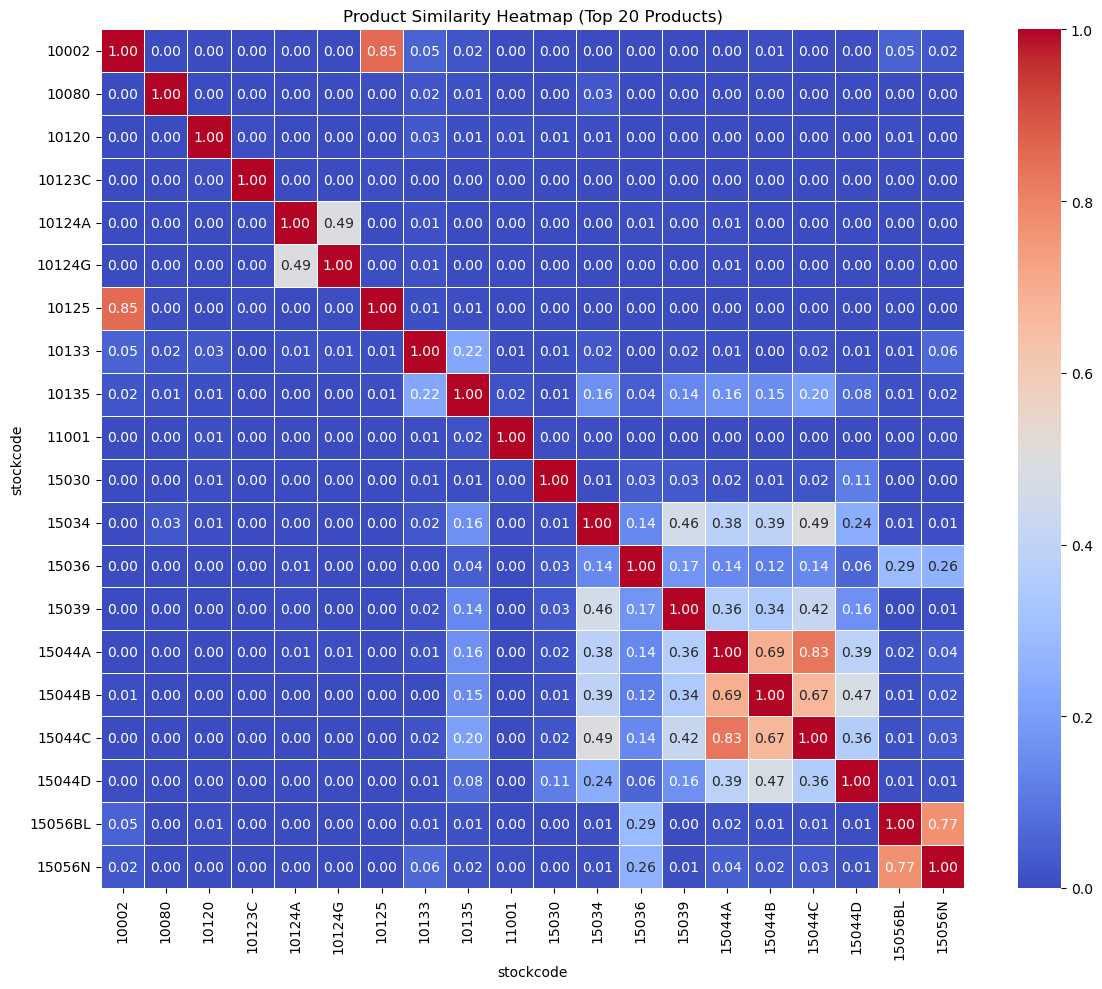

In [236]:
# Visualize the Similarity Heatmap (Top 20 Products)
import seaborn as sns
import matplotlib.pyplot as plt

# Pick top 20 for clarity
top_20 = item_sim_df.iloc[:20, :20]

plt.figure(figsize=(12, 10))
sns.heatmap(top_20, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Product Similarity Heatmap (Top 20 Products)")
plt.tight_layout()
plt.show()


In [237]:
data.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'total_price', 'date'],
      dtype='object')

In [238]:
data["description"].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [240]:
# average RFM values per cluster
cluster_profile = rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean().round(2)
print(cluster_profile)


         Recency  Frequency   Monetary
Cluster                               
0          43.70       3.68    1353.63
1         248.08       1.55     478.85
2           7.38      82.54  127187.96
3          15.50      22.33   12690.50


In [243]:
segment_map = {
    0: "Occasional",
    1: "At-Risk",
    2: "High-Value",
    3: "Regular"
}

rfm["Segment"] = rfm["Cluster"].map(segment_map)


In [249]:
rfm.head(20)

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346,326,1,77183.60,3,Regular
1,12347,2,7,4310.00,0,Occasional
2,12348,75,4,1797.24,0,Occasional
3,12349,19,1,1757.55,0,Occasional
4,12350,310,1,334.40,1,At-Risk
5,12352,36,8,2506.04,0,Occasional
6,12353,204,1,89.00,1,At-Risk
7,12354,232,1,1079.40,1,At-Risk
8,12355,214,1,459.40,1,At-Risk
9,12356,23,3,2811.43,0,Occasional


In [251]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4338 non-null   int32  
 1   Recency     4338 non-null   int64  
 2   Frequency   4338 non-null   int64  
 3   Monetary    4338 non-null   float64
 4   Cluster     4338 non-null   int32  
 5   Segment     4338 non-null   object 
dtypes: float64(1), int32(2), int64(2), object(1)
memory usage: 169.6+ KB


# Create Product-Customer Matrix

In [275]:

from sklearn.metrics.pairwise import cosine_similarity

# Create Product-Customer Matrix
filtered_data = data[['customerid', 'description', 'quantity']]
grouped = filtered_data.groupby(['description', 'customerid'])['quantity'].sum().unstack(fill_value=0)
product_customer_matrix = grouped

# Compute Cosine Similarity Between Products
product_similarity = cosine_similarity(product_customer_matrix)
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=product_customer_matrix.index,
    columns=product_customer_matrix.index
)

# model saving
with open('product_similarity.pkl', 'wb') as f:
    pickle.dump(product_similarity_df, f)



# Product Recommendation Function
def get_similar_products(product_name, top_n=5):
    """
    Returns top N similar products to the given product_name.

    Parameters:
        product_name (str): The product to search similar items for
        top_n (int): Number of similar products to return (default = 5)

    Returns:
        List of top N similar product names
    """
    try:
        if product_name not in product_similarity_df.columns:
            print(f"'{product_name}' not found in product list.")
            return []

        similar_scores = product_similarity_df[product_name].sort_values(ascending=False)
        similar_products = similar_scores.iloc[1:top_n+1].index.tolist()

        print(f"Top {top_n} similar products to '{product_name}':")
        for i, prod in enumerate(similar_products, start=1):
            print(f"{i}. {prod}")

        return similar_products

    except Exception as e:
        print(f"Error: {e}")
        return []

# Checking
get_similar_products("WHITE HANGING HEART T-LIGHT HOLDER")


Top 5 similar products to 'WHITE HANGING HEART T-LIGHT HOLDER':
1. GIN + TONIC DIET METAL SIGN
2. RED HANGING HEART T-LIGHT HOLDER
3. WASHROOM METAL SIGN
4. LAUNDRY 15C METAL SIGN
5. GREEN VINTAGE SPOT BEAKER


['GIN + TONIC DIET METAL SIGN',
 'RED HANGING HEART T-LIGHT HOLDER',
 'WASHROOM METAL SIGN',
 'LAUNDRY 15C METAL SIGN',
 'GREEN VINTAGE SPOT BEAKER']

In [264]:
data.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_price,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2022-12-01
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2022-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2022-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2022-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2022-12-01


# Streamlit code

In [ ]:
import streamlit as st
import numpy as np
import pickle

# ------------------------------
# Load Pickled Models and Data
# ------------------------------

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('kmeans.pkl', 'rb') as f:
    kmeans = pickle.load(f)

with open('product_similarity.pkl', 'rb') as f:
    product_similarity_df = pickle.load(f)

# ------------------------------
# Product Recommendation Function
# ------------------------------

def get_similar_products(product_name, top_n=5):
    if product_name not in product_similarity_df.columns:
        return []
    similar_scores = product_similarity_df[product_name].sort_values(ascending=False)
    return similar_scores.iloc[1:top_n+1].index.tolist()

# ------------------------------
# Streamlit App
# ------------------------------

st.set_page_config(page_title="Shopper Spectrum", layout="wide")
st.title("Shopper Spectrum: Customer Segmentation & Product Recommendations")

tab1, tab2 = st.tabs(["Product Recommender", "Customer Segmentation"])

# ---------------------------------
# Product Recommendation Tab
# ---------------------------------
with tab1:
    st.header("Product Recommendation Engine")

    product_list = sorted(product_similarity_df.columns.tolist())
    selected_product = st.selectbox("Select a Product for Recommendation", product_list)

    if st.button("Get Recommendations"):
        if selected_product:
            recommendations = get_similar_products(selected_product)
            if recommendations:
                st.success("Top 5 similar products:")
                for i, prod in enumerate(recommendations, 1):
                    st.write(f"{i}. {prod}")
            else:
                st.warning("Product not found. Please try a different name.")
        else:
            st.warning("Please select a product.")

# ---------------------------------
# Customer Segmentation Tab
# ---------------------------------
with tab2:
    st.header("Customer Segmentation Predictor")

    recency = st.number_input("Recency (in days)", min_value=0)
    frequency = st.number_input("Frequency (number of purchases)", min_value=0)
    monetary = st.number_input("Monetary (total spend)", min_value=0.0, format="%.2f")

    if st.button("Predict Cluster"):
        if recency == 0 and frequency == 0 and monetary == 0.0:
            st.warning("Please enter valid RFM values before prediction.")
        else:
            input_data = np.array([[recency, frequency, monetary]])
            input_scaled = scaler.transform(input_data)
            cluster_label = kmeans.predict(input_scaled)[0]

         
            cluster_names = {
                0: "High-Value",
                1: "Regular",
                2: "Occasional"
            }

            if cluster_label not in cluster_names:
                st.error("Prediction outside expected clusters.")
            else:
                segment = cluster_names[cluster_label]
                st.success(f"The customer belongs to the **{segment} customer segment**.")

 # footer
st.markdown("---")
st.caption("Developed for Shopper Spectrum Capstone Project")
